# <center> Midterm Exam

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def mean_absolute_percentage_error(y,y_pred):
    y=np.array(y)
    y_pred=np.array(y_pred)
    return 100*np.mean(np.abs((y-y_pred)/y))

In [3]:
df=pd.read_excel('sce.xlsx')
df.head()

,Date,Load,temp
0,2014-01-01 00:00:00,9891.0,59.4685
1,2014-01-01 01:00:00,9553.0,61.4030
2,2014-01-01 02:00:00,9222.0,55.0310
3,2014-01-01 03:00:00,9024.0,53.1878
4,2014-01-01 04:00:00,8987.0,51.9944


# 1

In [4]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month.astype(object)
df['day']=df['Date'].dt.day.astype(object)
df['hour']=df['Date'].dt.hour.astype(object)
df['day_of_week']=df['Date'].dt.dayofweek.astype(object)
df.head()

,Date,Load,temp,year,month,day,hour,day_of_week
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2


In [5]:
df.dtypes

Date           datetime64[ns]
Load                  float64
temp                  float64
year                    int64
month                  object
day                    object
hour                   object
day_of_week            object
dtype: object

In [6]:
import statsmodels.formula.api as smf

In [7]:
m1=smf.ols(formula='Load~year+month+day+hour+day_of_week',data=df).fit()

In [8]:
yhat=m1.predict(df)
yhat.head()

0    9918.880255
1    9436.421064
2    9118.871381
3    8960.476921
4    9053.230022
dtype: float64

In [9]:
y=df['Load']
mean_absolute_percentage_error(y,yhat)

8.069690608003665

In [10]:
m1.rsquared

0.7308342402829952

The MAPE of model 1 is 8.01, and the r-square is 0.73.

# 2

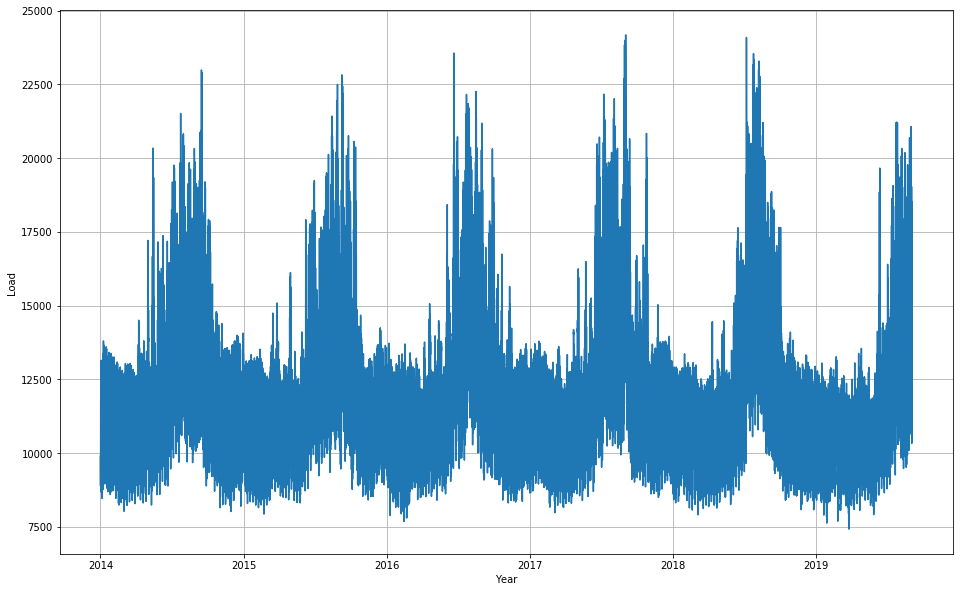

In [11]:
plt.figure(figsize=(16,10))
plt.plot(df.Date,df.Load)
plt.xlabel('Year')
plt.ylabel('Load')
plt.grid()

# 3

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly2=PolynomialFeatures(degree=2)
temp=df.temp.values.reshape(-1,1)
temp2=poly2.fit_transform(temp)
temp2

array([[1.00000000e+00, 5.94685000e+01, 3.53650249e+03],
       [1.00000000e+00, 6.14030000e+01, 3.77032841e+03],
       [1.00000000e+00, 5.50310000e+01, 3.02841096e+03],
       ...,
       [1.00000000e+00, 8.88970000e+01, 7.90267661e+03],
       [1.00000000e+00, 8.91035000e+01, 7.93943371e+03],
       [1.00000000e+00, 8.84475000e+01, 7.82296026e+03]])

In [13]:
from sklearn.linear_model import LinearRegression
m2=LinearRegression().fit(temp2,df.Load)
load_pdt=m2.predict(temp2)

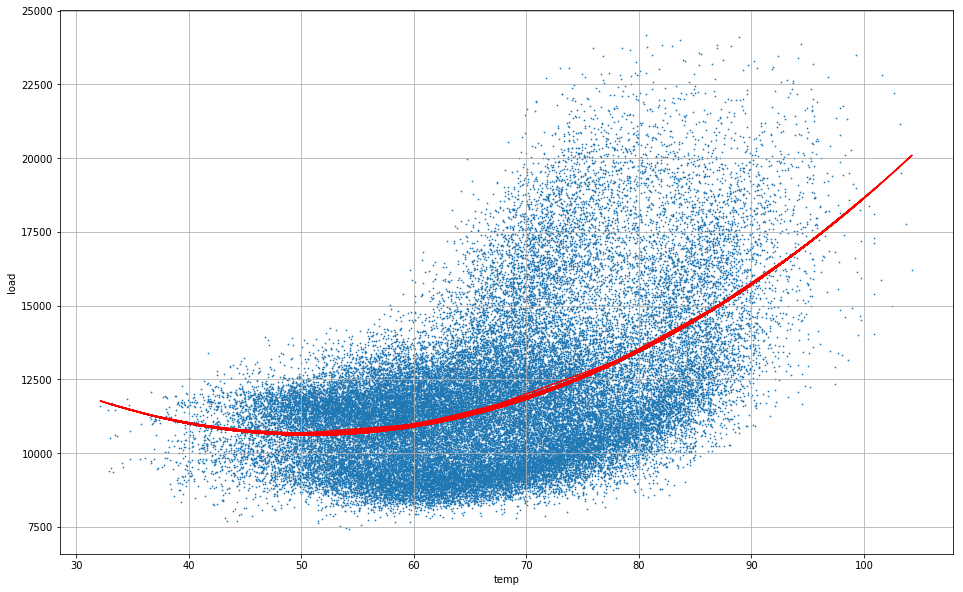

In [14]:
plt.figure(figsize=(16,10))
plt.scatter(df.temp,df.Load,s=0.5)
plt.xlabel('temp')
plt.ylabel('load')
plt.plot(df.temp,load_pdt,c='r')
plt.grid()

# 4

In [15]:
df['sq_temp']=df.temp**2
df.head()

,Date,Load,temp,year,month,day,hour,day_of_week,sq_temp
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,3536.502492
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,3770.328409
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,3028.410961
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,2828.942069
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,2703.417631


In [16]:
m3=smf.ols(formula='Load~sq_temp*hour+temp*hour+year+month+day+day_of_week',data=df).fit()

In [17]:
yhat2=m3.predict(df)
mean_absolute_percentage_error(y,yhat2)

5.171918662668264

In [18]:
m3.rsquared

0.8985126605900585

The MAPE of model 3 is 5.17, and the r-square is 0.90.

# 5

In [19]:
df['lag24']=df['Load'].shift(24)
df.head()

,Date,Load,temp,year,month,day,hour,day_of_week,sq_temp,lag24
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,3536.502492,NaN
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,3770.328409,NaN
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,3028.410961,NaN
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,2828.942069,NaN
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,2703.417631,NaN


In [20]:
df2=df.copy()
df2.dropna(axis=0,how='any',inplace=True)
df2.head()

,Date,Load,temp,year,month,day,hour,day_of_week,sq_temp,lag24
24,2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,4624.000000,9891.0
25,2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,3790.138409,9553.0
26,2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,3274.517508,9222.0
27,2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,3018.117919,9024.0
28,2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,3022.074708,8987.0


In [21]:
m4=smf.ols(formula='Load~sq_temp*hour+temp*hour+year+month+day+day_of_week+lag24',data=df2).fit()

In [22]:
yhat3=m4.predict(df2)
y2=df2['Load']
mean_absolute_percentage_error(y2,yhat3)

3.843793964337394

In [23]:
m4.rsquared

0.9409536275110548

The MAPE of model 4 is 3.84, and the r-square is 0.94.

# 6

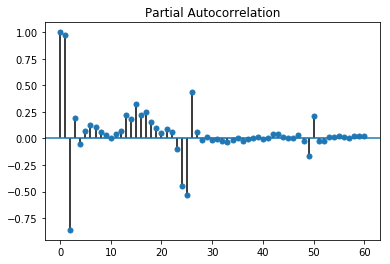

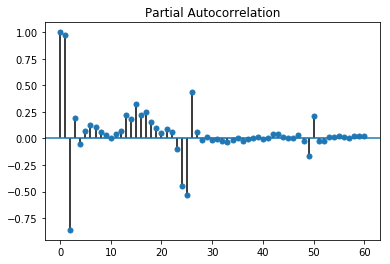

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Load,lags=60)

We can see that lags=1,2,15,17,24,25,26,50 have a large partial autocorrelations.

In [27]:
df['lag1']=df['Load'].shift(1)
df['lag2']=df['Load'].shift(2)
df['lag15']=df['Load'].shift(15)
df['lag17']=df['Load'].shift(17)
df['lag25']=df['Load'].shift(25)
df['lag26']=df['Load'].shift(26)
df['lag50']=df['Load'].shift(50)
df.head()

,Date,Load,temp,year,month,day,hour,day_of_week,sq_temp,lag24,lag1,lag2,lag15,lag17,lag25,lag26,lag50
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,3536.502492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,3770.328409,NaN,9891.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,3028.410961,NaN,9553.0,9891.0,NaN,NaN,NaN,NaN,NaN
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,2828.942069,NaN,9222.0,9553.0,NaN,NaN,NaN,NaN,NaN
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,2703.417631,NaN,9024.0,9222.0,NaN,NaN,NaN,NaN,NaN


In [28]:
df3=df.copy()
df3.dropna(axis=0,how='any',inplace=True)
df3.head()

,Date,Load,temp,year,month,day,hour,day_of_week,sq_temp,lag24,lag1,lag2,lag15,lag17,lag25,lag26,lag50
50,2014-01-03 02:00:00,8934.0,62.6225,2014,1,3,2,4,3921.577506,8682.0,9179.0,9592.0,11712.0,11458.0,8860.0,9191.0,9891.0
51,2014-01-03 03:00:00,8845.0,58.5662,2014,1,3,3,4,3429.999782,8676.0,8934.0,9179.0,11772.0,11673.0,8682.0,8860.0,9553.0
52,2014-01-03 04:00:00,9057.0,58.0370,2014,1,3,4,4,3368.293369,8917.0,8845.0,8934.0,11710.0,11712.0,8676.0,8682.0,9222.0
53,2014-01-03 05:00:00,9525.0,55.8950,2014,1,3,5,4,3124.251025,9553.0,9057.0,8845.0,11708.0,11772.0,8917.0,8676.0,9024.0
54,2014-01-03 06:00:00,10423.0,54.4388,2014,1,3,6,4,2963.582945,10236.0,9525.0,9057.0,11699.0,11710.0,9553.0,8917.0,8987.0


In [29]:
m5=smf.ols(formula='Load~sq_temp*hour+temp*hour+year+month+day+day_of_week+lag24+lag1+lag2+lag15+lag17+lag25+lag26+lag50',data=df3).fit()

In [30]:
yhat4=m5.predict(df3)
y3=df3['Load']
mean_absolute_percentage_error(y3,yhat4)

0.8166256615534334

In [31]:
m5.rsquared

0.9969568334122557

The MAPE of model 5 is 0.82, and the r-square is 0.997.

# 7

Among the above four models, the best model is model 5.

In [36]:
test_set=df3[df3.year==2019]
test_set.head()

,Date,Load,temp,year,month,day,hour,day_of_week,sq_temp,lag24,lag1,lag2
43824,2019-01-01 00:00:00,9761.0,57.92850,2019,1,1,0,1,3355.711112,9352.0,10122.0,10568.0
43825,2019-01-01 01:00:00,9438.0,57.03736,2019,1,1,1,1,3253.260436,8967.0,9761.0,10122.0
43826,2019-01-01 02:00:00,9177.0,55.31236,2019,1,1,2,1,3059.457169,8755.0,9438.0,9761.0
43827,2019-01-01 03:00:00,9024.0,52.90550,2019,1,1,3,1,2798.991930,8707.0,9177.0,9438.0
43828,2019-01-01 04:00:00,9015.0,50.70200,2019,1,1,4,1,2570.692804,8881.0,9024.0,9177.0


In [37]:
train_set=df3[df3.year!=2019]
train_set.head()

,Date,Load,temp,year,month,day,hour,day_of_week,sq_temp,lag24,lag1,lag2
24,2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,4624.000000,9891.0,9653.0,10408.0
25,2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,3790.138409,9553.0,9191.0,9653.0
26,2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,3274.517508,9222.0,8860.0,9191.0
27,2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,3018.117919,9024.0,8682.0,8860.0
28,2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,3022.074708,8987.0,8676.0,8682.0


In [38]:
m6=smf.ols(formula='Load~sq_temp*hour+temp*hour+year+month+day+day_of_week+lag24+lag1+lag2',data=train_set).fit()

In [39]:
yhat5=m6.predict(test_set)
y4=test_set['Load']
mean_absolute_percentage_error(y4,yhat5)

1.057179120914638

In [40]:
yavg=test_set.Load.mean()
yavg

11344.222711748635

In [41]:
y4_list=list(y4.values)
yhat5_list=list(yhat5.values)

In [42]:
sst=0
ssr=0
for y in y4_list:
    sst=sst+(y-yavg)**2
for yhat in yhat5_list:
    ssr=ssr+(yhat-yavg)**2
r_square=ssr/sst
r_square

0.9892805099170785

The MAPE of the test set is 1.06, and the r-square is 0.99.

# 8

In [43]:
df['month']=[str(i).zfill(2) for i in df['month']]
df['month']=df['month'].astype(str)
df['year']=df['year'].astype(str)
df['Year_Month']=df.year+'-'+df.month
df.head()

,Date,Load,temp,year,month,day,hour,day_of_week,sq_temp,lag24,lag1,lag2,Year_Month
0,2014-01-01 00:00:00,9891.0,59.4685,2014,01,1,0,2,3536.502492,NaN,NaN,NaN,2014-01
1,2014-01-01 01:00:00,9553.0,61.4030,2014,01,1,1,2,3770.328409,NaN,9891.0,NaN,2014-01
2,2014-01-01 02:00:00,9222.0,55.0310,2014,01,1,2,2,3028.410961,NaN,9553.0,9891.0,2014-01
3,2014-01-01 03:00:00,9024.0,53.1878,2014,01,1,3,2,2828.942069,NaN,9222.0,9553.0,2014-01
4,2014-01-01 04:00:00,8987.0,51.9944,2014,01,1,4,2,2703.417631,NaN,9024.0,9222.0,2014-01


In [44]:
season_val=df.groupby([df.Year_Month])['Load'].agg('sum')
season_val.head()

Year_Month
2014-01    8.125121e+06
2014-02    7.115328e+06
2014-03    7.880222e+06
2014-04    7.834732e+06
2014-05    8.938985e+06
Name: Load, dtype: float64

In [45]:
season_val=season_val.to_frame()
season_val.head()

,Load
Year_Month,
2014-01,8.125121e+06
2014-02,7.115328e+06
2014-03,7.880222e+06
2014-04,7.834732e+06
2014-05,8.938985e+06


In [46]:
season_val.reset_index(level='Year_Month',inplace=True)
season_val.head()

,Year_Month,Load
0,2014-01,8.125121e+06
1,2014-02,7.115328e+06
2,2014-03,7.880222e+06
3,2014-04,7.834732e+06
4,2014-05,8.938985e+06


In [47]:
newval=season_val['Year_Month'].str.split('-')
season_val['Year'],season_val['Month']=season_val['Year_Month'].str.split('-',1).str
season_val.head()

,Year_Month,Load,Year,Month
0,2014-01,8.125121e+06,2014,01
1,2014-02,7.115328e+06,2014,02
2,2014-03,7.880222e+06,2014,03
3,2014-04,7.834732e+06,2014,04
4,2014-05,8.938985e+06,2014,05


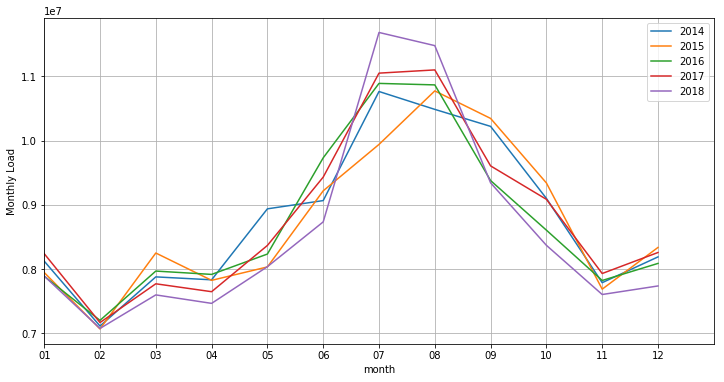

In [48]:
plt.figure(figsize=(12,6))
l=list(season_val['Year'].unique())
l.pop()
for y in l:
    val=season_val[season_val.Year==y]
    plt.plot(val.Month,val.Load)
plt.xlabel('month')
plt.ylabel('Monthly Load')
plt.xlim(0,12)
plt.legend(labels=l)
plt.grid()